<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/Probability_Calculation_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cálculo das Probabilidades**

### **1. Introdução**
O presente laboratório aborda conceitos fundamentais de probabilidade e sistemas probabilísticos, com foco em simulações práticas e aplicações em ciência de dados. O objetivo aqui é ilustrar como a **Teoria da Probabilidade** pode ser aplicada na resolução de problemas reais, testes médicos de diagnóstico e simulações de eventos aleatórios.

#### **2. Conteúdos Abordados**
1. **Definições de Probabilidade**
   - **Probabilidade Clássica (Laplace):** baseada em casos favoráveis sobre casos possíveis.
   - **Probabilidade Frequencial:** baseada na frequência relativa de eventos em experimentos repetidos.

2. **Sistemas Probabilísticos**
   - **Espaço Amostral (Ω):** conjunto de todos os resultados possíveis.
   - **Eventos (F):** cubconjuntos do espaço amostral.
   - **Funções de Probabilidade (P):** atribuição de probabilidades a eventos.

3. **Axiomas de Kolmogorov**
   - **Não negatividade:** A probabilidade de qualquer evento é sempre maior ou igual a zero.
   - **Probabilidade total do espaço amostral:** A probabilidade do espaço amostral é 1.
   - **Aditividade contável:** A probabilidade da união de eventos disjuntos é a soma de suas probabilidades.

4. **Variáveis Aleatórias**
   - **Discretas:** Assumem valores em um conjunto finito ou enumerável.
   - **Contínuas:** Podem assumir qualquer valor em um intervalo real.

5. **Distribuições de Probabilidade**
   - **Função de Probabilidade (FP):** Para variáveis discretas.
   - **Função de Densidade de Probabilidade (FDP):** Para variáveis contínuas.
   - **Função de Distribuição Acumulada (FDA):** Probabilidade acumulada até um valor.
6. **Probabilidade Condicional e Teorema de Bayes**
  - **Probabilidade Condicional:** probabilidade de um evento ocorrer, dado que outro já ocorreu.
  - **Teoria de Bayes:** a base da inferência Estatística.

#### **3. Simulações Práticas**

As simulações práticas ilustram como a teoria pode ser usada para modelar sistemas complexos e tomar decisões informadas.

1. **Simulação do Lançamento de um Dado**
   - Simulação de um dado honesto e um dado viciado.
   - Cálculo da probabilidade de obter um valor específico (ex: 2).
   - Comparação entre a probabilidade teórica e a empírica.

2. **Cálculo do Erro Médio Absoluto**
   - Comparação entre a probabilidade teórica e a observada em simulações repetidas.
   - Ilustração da Lei dos Grandes Números.

3. **Teste de Sensibilidade e Especificidade**
   - Cálculo da probabilidade de um teste positivo ser verdadeiro usando o Teorema de Bayes.
   - Simulação de uma população para validar os resultados.

---

## **Definições de Probabilidade**

#### **1. Definição de Laplace (Probabilidade Clássica)**
A definição de Laplace de probabilidade, também chamada de **probabilidade clássica**, se aplica a experimentos onde todos os eventos elementares possuem a mesma chance de ocorrer. A probabilidade de um evento $A$ é dada por:

$$ P(A) = \frac{\text{Número de casos favoráveis a } A}{\text{Número total de casos possíveis}}
$$

Essa definição é válida apenas quando todos os eventos têm a mesma probabilidade de ocorrer. Um exemplo clássico é o lançamento de um dado justo:

- $ P(A) = \frac{3}{6} = 0.5 $ para o evento "sair um número par".
- $ P(B) = \frac{1}{6} $ para o evento "sair um número igual a 3".

#### **2. Definição Frequencial de Probabilidade**
A **probabilidade frequencial** define a probabilidade como o limite da frequência relativa de um evento à medida que o número de experimentos tende ao infinito. Formalmente, temos:

$$ P(A) = \lim_{n \to \infty} \frac{N_A}{n} $$

onde:
- $ N_A $ é o número de vezes que o evento $ A $ ocorreu,
- $ n $ é o número total de experimentos realizados.

Essa definição é amplamente utilizada em inferência estatística e aprendizado de máquina, pois permite estimar probabilidades a partir de observações reais. Por exemplo, se lançarmos um dado 10.000 vezes e o número 3 sair 1.700 vezes, a estimativa da probabilidade de sair um 3 seria:

$$ P(3) \approx \frac{1700}{10000} = 0.17 $$

Embora essa estimativa seja próxima do valor teórico de $ 1/6 $, pequenas variações ocorrem devido à aleatoriedade do experimento.


## **Sistemas Probabilísticos**

### **Definição**

Um **sistema probabilístico** é um conjunto de elementos cujas ocorrências ou ações são **aleatórias**, ou seja, não seguem um padrão determinístico. Em oposição a sistemas determinísticos, onde os resultados são previsíveis dadas as mesmas condições iniciais, os sistemas probabilísticos produzem **resultados diferentes** mesmo sob condições idênticas.

#### **Componentes Fundamentais**
1. **Espaço Amostral ($\Omega$)**: Conjunto de todos os possíveis resultados do experimento aleatório.
2. **Eventos ($F$)**: Subconjuntos do espaço amostral que representam um ou mais resultados de interesse.
3. **Função de Probabilidade ($P$)**: Regra que atribui a cada evento um número real entre 0 e 1, obedecendo aos axiomas da probabilidade de Kolmogorov.

#### **Exemplos de Sistemas Probabilísticos**
1. **Rolagem de um dado**:
   - $ \Omega = \{1,2,3,4,5,6\} $
   - Evento: "Sair um número par" ($ A = \{2,4,6\} $)
   - Probabilidade: $ P(A) = \frac{3}{6} = 0.5 $

2. **Temperatura ambiente em um dia aleatório**:
   - $ \Omega = \mathbb{R} $ (conjunto de números reais)
   - Evento: "Temperatura acima de 30°C" ($ B = \{T > 30\} $)
   - Como o espaço amostral é contínuo, utilizamos uma **função de densidade de probabilidade** para calcular $ P(B) $.

## **Importando as bibliotecas**

---





In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats
from scipy.stats import binom, poisson, geom

## **Simulação do experimento de lançamento de um dado (6 faces)**

---
O código a seguir simula um experimento de lançar um dado de 6 faces (`np.random.randint(6)`) `N` vezes e conta quantas vezes o resultado é 2.
* **Funcionamento:**
    * Inicializa um contador `count` com 0.
    * Repete `N` vezes:
        * Gera um número aleatório `X` entre 1 e 6 (inclusive), simulando o lançamento do dado.
        * Se `X` for igual a 2, incrementa o contador `count`.
    * Retorna a diferença absoluta entre a probabilidade teórica de sair 2 em um lançamento de dado (1/6) e a probabilidade empírica obtida no experimento (`count/N`).




In [3]:
def six_sided_die(N):
    """
    Simula N experimentos de lançamento de um dado e calcula a probabilidade
    de obter o valor 2.

    Parâmetros:
    N (int): Número de experimentos (lançamentos do dado) a serem simulados.

    Retorna:
    float: Probabilidade de obter o valor 2, calculada como (número de sucessos) / N.
    """
    # Contador de sucessos (vezes que o valor 2 foi obtido)
    count = 0

    # Simula N lançamentos do dado
    for _ in range(N):
        # Gera um número aleatório entre 2 e 7 (1 + randint(1,6))
        X = 1 + random.randint(1, 6)

        # Verifica se o valor obtido é 2 (evento de interesse)
        if X == 2:
            count += 1

    # Calcula a probabilidade de obter o valor 2
    probabilidade = count / N
    return probabilidade

# Executa a simulação com 10.000 experimentos
N = 10000
resultado = six_sided_die(N)
print(f"Probabilidade estimada de obter o valor 2 após {N} lançamentos: {resultado:.4f}")

Probabilidade estimada de obter o valor 2 após 10000 lançamentos: 0.1680


## **Cálculo do erro médio absoluto entre a probabilidade teórica**

O código a seguir calcula o erro médio absoluto entre a probabilidade teórica ($ \frac{1}{6} \approx 0.1667 $) e a probabilidade observada em $ M = 1000 $ repetições do experimento para diferentes valores de $ N $. A saída demostra que o erro médio diminui à medida que $ N $ aumenta, corroborando a **Lei dos Grandes Números**.

In [5]:
def calcular_erro_experimento(N):
    """
    Simula N lançamentos de um dado e calcula o erro absoluto entre a probabilidade
    teórica de obter o valor 2 e a probabilidade observada nos experimentos.

    Parâmetros:
    N (int): Número de lançamentos do dado a serem simulados.

    Retorna:
    float: Erro absoluto entre a probabilidade teórica e a observada.
    """
    count = 0  # Contador de sucessos (vezes que o valor 2 foi obtido)

    # Simula N lançamentos do dado
    for _ in range(N):
        X = 1 + np.random.randint(6)  # Gera um número aleatório entre 1 e 6
        if X == 2:  # Verifica se o valor obtido é 2
            count += 1

    # Probabilidade teórica de obter o valor 2
    probabilidade_teorica = 1.0 / 6.0

    # Probabilidade observada nos experimentos
    probabilidade_observada = count / N

    # Erro absoluto entre a probabilidade teórica e a observada
    erro_absoluto = abs(probabilidade_teorica - probabilidade_observada)
    return erro_absoluto

def calcular_erro_medio(N, M):
    """
    Calcula o erro médio absoluto ao repetir o experimento M vezes para um dado N.

    Parâmetros:
    N (int): Número de lançamentos do dado em cada experimento.
    M (int): Número de vezes que o experimento será repetido.

    Retorna:
    float: Erro médio absoluto.
    """
    erro_total = 0.0

    # Repete o experimento M vezes
    for _ in range(M):
        erro_total += calcular_erro_experimento(N)

    # Calcula o erro médio
    erro_medio = erro_total / M
    return erro_medio

# Valores de N (número de lançamentos) a serem testados
valores_de_N = [10, 100, 1000, 10000]
M = 1000  # Número de repetições para cada N

# Calcula e exibe o erro médio para cada N
for N in valores_de_N:
    erro_medio = calcular_erro_medio(N, M)
    print(f"Erro médio absoluto para N = {N}: {erro_medio:.4f}")

Erro médio absoluto para N = 10: 0.0985
Erro médio absoluto para N = 100: 0.0299
Erro médio absoluto para N = 1000: 0.0093
Erro médio absoluto para N = 10000: 0.0030


## **Simulação da rolagem de um dado honesto vs viciado**

---

In [42]:
# Define uma paleta de cores suaves
# paleta_cores = sns.color_palette("pastel")

def config_paleta_cores(tipo_paleta='viridis', num_cores=None):
  """
  Configura uma paleta de cores usando o Seaborn.

  Args:
    tipo_paleta: O tipo de paleta de cores desejada (e.g., "pastel", "viridis", "magma").
    num_cores: O número de cores na paleta. Se None, usa o padrão do tipo de paleta.

  Returns:
    Uma lista de cores.
  """
  paleta_cores = sns.color_palette(tipo_paleta, num_cores)
  return paleta_cores

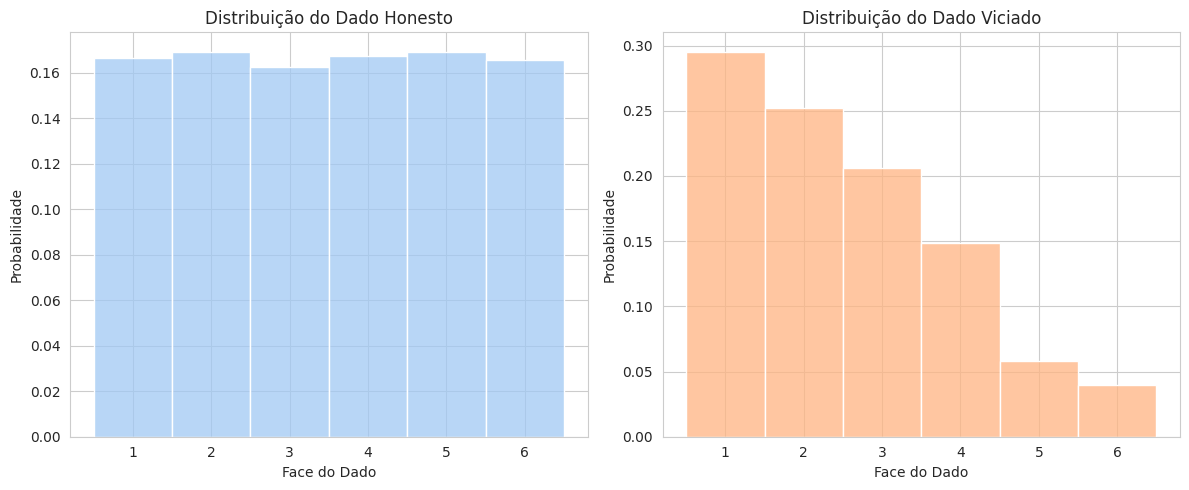

In [43]:
# Simulação da rolagem de um dado honesto (equiprovável)
np.random.seed(42)
n_simulations = 10000
dado_honesto = np.random.randint(1, 7, size=n_simulations)

# Simulação da rolagem de um dado viciado (favoritismo para valores baixos)
pesos = [0.3, 0.25, 0.2, 0.15, 0.06, 0.04]  # Probabilidades somam 1
valores = [1, 2, 3, 4, 5, 6]
dado_viciado = np.random.choice(valores, size=n_simulations, p=pesos)

# Define uma paleta de cores suaves
paleta_cores = sns.color_palette("pastel")

# Plotando as distribuições com Seaborn
plt.figure(figsize=(12, 5))

# Dado honesto
plt.subplot(1, 2, 1)
sns.histplot(dado_honesto, bins=np.arange(0.5, 7.5, 1), kde=False, stat="probability", color=paleta_cores[0])
plt.xticks(range(1, 7))
plt.title("Distribuição do Dado Honesto")
plt.xlabel("Face do Dado")
plt.ylabel("Probabilidade")

# Dado viciado
plt.subplot(1, 2, 2)
sns.histplot(dado_viciado, bins=np.arange(0.5, 7.5, 1), kde=False, stat="probability", color=paleta_cores[1])
plt.xticks(range(1, 7))
plt.title("Distribuição do Dado Viciado")
plt.xlabel("Face do Dado")
plt.ylabel("Probabilidade")

plt.tight_layout()
plt.show()

### **Axiomas de Kolmogorov**
Os **axiomas de Kolmogorov** formam a base matemática da teoria da probabilidade. Eles são três princípios fundamentais que qualquer função de probabilidade $P$ deve satisfazer:

1. **Não negatividade:** A probabilidade de qualquer evento $A$ é sempre maior ou igual a zero.
   $$
   P(A) \geq 0, \quad \forall A \in F
   $$

2. **Probabilidade total do espaço amostral:** A probabilidade do espaço amostral completo é sempre igual a 1.
   $$
   P(\Omega) = 1
   $$
   Isso significa que, em qualquer experimento, algum resultado deve ocorrer.

3. **Aditividade contável (ou σ-aditividade):** Se $A_1, A_2, A_3, \dots$ são eventos mutuamente exclusivos (ou seja, $A_i \cap A_j = \emptyset$ para $i \neq j$), então:
   $$
   P\left(\bigcup_{i=1}^{\infty} A_i\right) = \sum_{i=1}^{\infty} P(A_i)
   $$
   Ou seja, a probabilidade da união de eventos disjuntos é a soma de suas probabilidades individuais.

### **Consequências dos Axiomas**
A partir desses axiomas, podemos derivar várias propriedades fundamentais da probabilidade:

- **Probabilidade do evento vazio:** Como $\emptyset$ não contém nenhum resultado, sua probabilidade é zero.
  $$
  P(\emptyset) = 0
  $$

- **Probabilidade do complemento:** A probabilidade de um evento não ocorrer é dada por:
  $$
  P(A^c) = 1 - P(A)
  $$
  Isso decorre do fato de que $A \cup A^c = \Omega$ e $A \cap A^c = \emptyset$.

- **Probabilidade da união de dois eventos quaisquer:** Para quaisquer dois eventos $A$ e $B$, temos:
  $$
  P(A \cup B) = P(A) + P(B) - P(A \cap B)
  $$
  Isso corrige a sobreposição entre $A$ e $B$ quando ambos ocorrem simultaneamente.

Os axiomas de Kolmogorov fornecem uma estrutura matemática para a teoria da probabilidade e são amplamente utilizados em aprendizado de máquina e modelagem de incerteza.

## **Probabilidade Condicional**

---



É fundamental entender a **probabilidade condicional**, ou seja, a probabilidade de um evento $ A $ ocorrer, dado que um evento $ B $ já ocorreu, é definida por:

$$
P(A | B) = \frac{P(A \cap B)}{P(B)}
$$

Onde:
- $P(A | B)$ é a probabilidade condicional de $A$, dado $B$.
- $P(A \cap B)$ é a probabilidade conjunta de $A$ e $B$ ocorrerem simultaneamente.
- $P(B)$ é a probabilidade do evento $B$.

Se reescrevermos a equação para $P(B | A)$, temos:

$$
P(B | A) = \frac{P(A \cap B)}{P(A)}
$$

## **Teoria de Bayes: a base da Inferência Estatística**

---

O **Teorema de Bayes** é um dos pilares da estatística e da inferência probabilística. A Teoria de Bayes, formulada pelo reverendo Thomas Bayes no século XVIII, é um pilar fundamental da estatística e probabilidade que permite atualizar nossas crenças sobre um evento à medida que novas evidências se tornam disponíveis.

No cerne dessa teoria está o Teorema de Bayes, uma equação que descreve como calcular probabilidades condicionais. O qual permite calcular a probabilidade de um evento com base em informações previamente conhecidas, sendo amplamente utilizado em diversos campos, como aprendizado de máquina, bioestatística, ciência de dados e inteligência artificial.


### **Enunciado do Teorema de Bayes**

O **Teorema de Bayes** expressa a relação entre duas probabilidades condicionais, é expresso da seguinte forma:

$$ P(A | B) = \frac{P(B | A) P(A)}{P(B)} $$

Onde:

* **P(A|B)**: Probabilidade *a posteriori* do evento $A$, dado que o evento $B$ ocorreu.
* **P(B|A)**: Probabilidade *verossimilhança* do evento $B$, dado que o evento $A$ ocorreu.
* **P(A)**: Probabilidade prévia ou *a priori* do evento $A$, antes de considerar a evidência $B$.
* **P(B)**: Probabilidade total ou marginal do evento $B$, que serve como fator de normalização.

Em termos mais simples, o Teorema de Bayes nos permite atualizar nossa crença inicial em $ A(P(A)) $ com base na nova evidência $ B $, resultando em uma nova crença $ P(A|B) $.

Na prática:
- $P(A)$ representa o **conhecimento prévio** sobre um evento.
- $P(B | A)$ representa **como as evidências afetam a crença inicial**.
- $P(A | B)$ representa **a crença revisada (probabilidade posterior)** com base nas novas evidências.

Se houver múltiplos eventos $ A_i $, formando uma **partição** do espaço amostral, podemos calcular $ P(B) $ pela **Regra da Probabilidade Total**:

$$ P(B) = \sum_{i} P(B | A_i) P(A_i) $$

Para saber mais consulte o artigo: [Teorema de Bayes](https://en.wikipedia.org/wiki/Bayes%27_theorem)


### **Exemplo Clássico: Diagnóstico Médico 1**

---



Imagine que um teste diagnóstico para uma doença tem:

- **Sensibilidade**: $P(T+ | D) = 0.9$ (probabilidade de testar positivo se a pessoa estiver doente).
- **Especificidade**: $P(T- | \neg D) = 0.95$ (probabilidade de testar negativo se a pessoa não estiver doente).
- **Prevalência** da doença: $P(D) = 0.01$.

Queremos calcular a probabilidade de uma pessoa que testou positivo realmente estar doente: $P(D | T+)$.

Usando o Teorema de Bayes:

$$
P(D | T+) = \frac{P(T+ | D) P(D)}{P(T+)}
$$

Calculamos $P(T+)$ pela regra da probabilidade total:

$$
P(T+) = P(T+ | D) P(D) + P(T+ | \neg D) P(\neg D)
$$

Substituindo os valores:

$$
P(T+) = (0.9 \times 0.01) + (0.05 \times 0.99) = 0.009 + 0.0495 = 0.0585
$$

Agora aplicamos o Teorema de Bayes:

$$
P(D | T+) = \frac{(0.9 \times 0.01)}{0.0585} = \frac{0.009}{0.0585} \approx 0.154
$$

Ou seja, **mesmo com um teste altamente preciso, a chance de um paciente positivo realmente estar doente é apenas 15,4%**. Isso demonstra como a prevalência da doença impacta a interpretação de um teste.

### **Exemplo Clássico: Diagnóstico Médico 2**

---

Imagine um teste médico para uma doença rara. O teste não é perfeito, com uma taxa de falso positivo de 5% e uma taxa de falso negativo de 2%. A prevalência da doença na população é de 1%.

**Se um paciente testa positivo, qual é a probabilidade real de ele ter a doença?**

* **A**: Paciente tem a doença
* **B**: Teste positivo

Aplicando o Teorema de Bayes:

* **P(A|B)**: Probabilidade de ter a doença dado o teste positivo (o que queremos saber)
* **P(B|A)**: Probabilidade de testar positivo dado que tem a doença (1 - taxa de falso negativo) = 98%
* **P(A)**: Probabilidade a priori de ter a doença (prevalência) = 1%
* **P(B)**: Probabilidade de testar positivo (considerando todos os casos) = (1% * 98%) + (99% * 5%) = 5,93%

```
P(A|B) = (0.98 * 0.01) / 0.0593 ≈ 0.1653
```

Mesmo com um teste positivo, a probabilidade real de ter a doença é de apenas 16,53%. Com efeito, a simulação a seguir ilustra como a Teoria de Bayes é crucial em diagnósticos médicos, pois leva em conta a prevalência da doença e a precisão do teste.

### **Simulação de Diagnóstico Médico**

---


In [19]:
def teorema_de_bayes(P_A, P_B_dado_A, P_B):
  """
  Calcula a probabilidade a posteriori P(A|B) usando o Teorema de Bayes.

  Args:
    P_A: Probabilidade a priori do evento A.
    P_B_dado_A: Probabilidade de B dado A.
    P_B: Probabilidade marginal do evento B.

  Returns:
    Probabilidade a posteriori P(A|B).
  """
  return (P_B_dado_A * P_A) / P_B

# Dados do exemplo médico
P_doenca = 0.01  # Prevalência da doença
P_positivo_dado_doenca = 0.98  # Sensibilidade do teste
P_positivo = (P_doenca * P_positivo_dado_doenca) + ((1 - P_doenca) * 0.05)  # Probabilidade de testar positivo

# Calcula a probabilidade a posteriori
P_doenca_dado_positivo = teorema_de_bayes(P_doenca, P_positivo_dado_doenca, P_positivo)

print(f"Probabilidade de ter a doença dado um teste positivo: {P_doenca_dado_positivo:.4f}")

Probabilidade de ter a doença dado um teste positivo: 0.1653


## **Simulação: Probabilidade de ser usuário de droga, dado teste positivo**

---

A probabilidade de um teste positivo ser verdadeiro é influenciada pela prevalência da condição e pela precisão do teste.



Suponha que um teste específico para saber se alguém está usando _cannabis_ seja 90% sensível, o que significa que a taxa de Verdadeiro Positivo (TPR) = 0,90. Portanto, ele leva a 90% de resultados verdadeiros positivos (identificação correta do uso de drogas) para usuários de cannabis.

O teste também é 80% específico, o que significa que a taxa de Verdadeiro Negativo (TNR) = 0,80. Portanto, o teste identifica corretamente 80% de não uso para não usuários, mas também gera 20% de falsos positivos, ou taxa de falso positivo (FPR) = 0,20, para não usuários.

Assumindo uma prevalência de 0,05, o que significa que 5% das pessoas usam cannabis, qual é a probabilidade de que uma pessoa aleatória que testa positivo seja realmente um usuário de cannabis?

In [53]:
# Parâmetros do problema
sensibilidade = 0.90   # Probabilidade de teste positivo se for usuário (TPR)
especificidade = 0.80  # Probabilidade de teste negativo se não for usuário (TNR)
prevalencia = 0.05     # Prevalência do uso na população (5%)

# Cálculo usando o Teorema de Bayes
def calcular_probabilidade_positivo_real(sensibilidade, especificidade, prevalencia):
    # Probabilidade de não ser usuário
    probabilidade_nao_usuario = 1 - prevalencia

    # Probabilidade de teste positivo se não for usuário (FPR)
    probabilidade_falso_positivo = 1 - especificidade

    # Numerador: P(Positivo | Usuário) * P(Usuário)
    numerador = sensibilidade * prevalencia

    # Denominador: P(Positivo) = P(Positivo | Usuário)P(Usuário) + P(Positivo | Não Usuário)P(Não Usuário)
    denominador = numerador + probabilidade_falso_positivo * probabilidade_nao_usuario

    # Probabilidade de ser usuário dado que testou positivo (PPV)
    ppv = numerador / denominador
    return ppv

# Resultado
ppv = calcular_probabilidade_positivo_real(sensibilidade, especificidade, prevalencia)
print(f"Probabilidade de ser usuário dado teste positivo: {ppv * 100:.2f}%")

Probabilidade de ser usuário dado teste positivo: 19.15%


In [54]:
# Ilustração com uma população simulada
def simulacao_populacao(populacao_total, sensibilidade, especificidade, prevalencia):
    num_usuarios = int(populacao_total * prevalencia)
    num_nao_usuarios = populacao_total - num_usuarios

    # Verdadeiros positivos e falsos positivos
    verdadeiros_positivos = int(num_usuarios * sensibilidade)
    falsos_positivos = int(num_nao_usuarios * (1 - especificidade))

    total_positivos = verdadeiros_positivos + falsos_positivos

    # Probabilidade calculada a partir dos casos simulados
    ppv_simulado = verdadeiros_positivos / total_positivos if total_positivos > 0 else 0
    return ppv_simulado

# Simulação com 1.000.000 de pessoas para precisão
populacao = 1_000_000
ppv_simulado = simulacao_populacao(populacao, sensibilidade, especificidade, prevalencia)
print(f"Resultado simulado com população de {populacao}:")
print(f"Verdadeiros positivos: {int(populacao * prevalencia * sensibilidade)}")
print(f"Falsos positivos: {int(populacao * (1 - prevalencia) * (1 - especificidade))}")
print(f"Probabilidade simulada de ser usuário dado teste positivo: {ppv_simulado * 100:.2f}%")

Resultado simulado com população de 1000000:
Verdadeiros positivos: 45000
Falsos positivos: 189999
Probabilidade simulada de ser usuário dado teste positivo: 19.15%


### **Aplicações do Teorema de Bayes**
O Teorema de Bayes tem diversas aplicações práticas:

#### **1. Inferência Estatística**
  - Métodos Bayesianos são usados para atualizar distribuições de probabilidade à medida que novos dados são observados.
  - Aplicações incluem **previsão do tempo**, **avaliação de risco em seguros** e **financeiras**.

#### **2. Aprendizado de Máquina e Classificadores Bayesianos**
  - O **classificador Naive Bayes** é amplamente utilizado em **processamento de linguagem natural (PLN)** e **detecção de spam**.
  - Baseia-se na suposição de independência entre variáveis para calcular a probabilidade de uma categoria de classe.

#### **3. Biologia e Genética**
  - Usado para inferir relações evolutivas entre espécies (Filogenia Bayesiana).
  - Aplicado para identificar mutações genéticas em testes médicos.

#### **4. Segurança Cibernética e Detecção de Fraude**
- Algoritmos Bayesianos ajudam a identificar atividades fraudulentas com base em padrões históricos de transações financeiras.

#### **5. Jogos e Inteligência Artificial**
- Utilizado em sistemas de tomada de decisão como **agentes inteligentes**, **bots em jogos** e **sistemas de recomendação**.

## **Variáveis Aleatórias**
---

Uma **variável aleatória** (VA) é uma função que associa um número real a cada evento no espaço amostral. São amplamente utilizadas para modelar fenômenos aleatórios de maneira quantitativa.

### **Tipos de Variáveis Aleatórias**
1. **Variáveis Aleatórias Discretas:** Assumem um conjunto finito ou enumerável de valores.
   - Exemplo: Número de caras ao lançar três moedas.
   - Distribuições comuns: Binomial, Poisson, Geométrica.

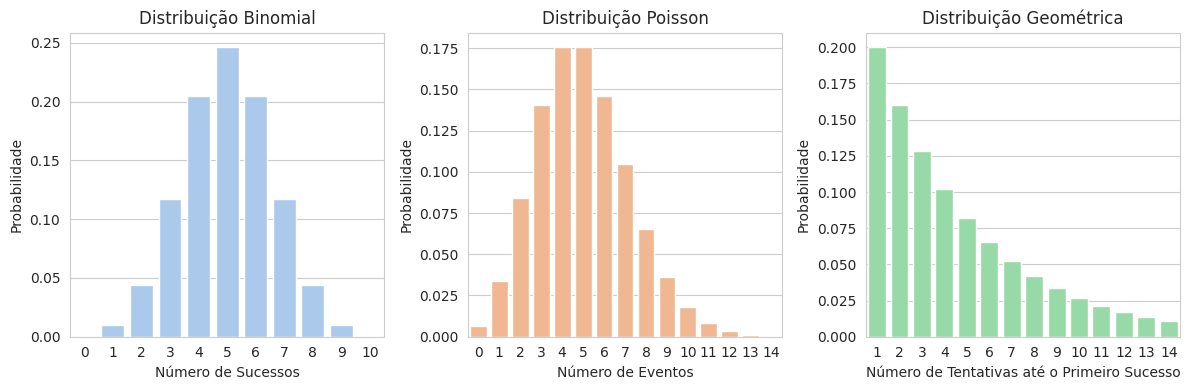

In [44]:
# Plotando as  distribuições Binomial, Poisson e Geométrica
# Parâmetros para as distribuições
n = 10  # Número de ensaios (Binomial)
p = 0.5  # Probabilidade de sucesso (Binomial)
mu = 5  # Média (Poisson)
p_geom = 0.2  # Probabilidade de sucesso (Geométrica)

# Valores de x para os gráficos
x_binom = np.arange(0, n + 1)
x_poisson = np.arange(0, 15)  # Ajuste o intervalo conforme necessário
x_geom = np.arange(1, 15)  # Ajuste o intervalo conforme necessário

# Cálculo das probabilidades
binom_probs = binom.pmf(x_binom, n, p)
poisson_probs = poisson.pmf(x_poisson, mu)
geom_probs = geom.pmf(x_geom, p_geom)

# Criando os gráficos
plt.figure(figsize=(12, 4))

# Gráfico Binomial
plt.subplot(1, 3, 1)
sns.barplot(x=x_binom, y=binom_probs, color=paleta_cores[0])
plt.title("Distribuição Binomial")
plt.xlabel("Número de Sucessos")
plt.ylabel("Probabilidade")

# Gráfico Poisson
plt.subplot(1, 3, 2)
sns.barplot(x=x_poisson, y=poisson_probs, color=paleta_cores[1])
plt.title("Distribuição Poisson")
plt.xlabel("Número de Eventos")
plt.ylabel("Probabilidade")

# Gráfico Geométrica
plt.subplot(1, 3, 3)
sns.barplot(x=x_geom, y=geom_probs, color=paleta_cores[2])
plt.title("Distribuição Geométrica")
plt.xlabel("Número de Tentativas até o Primeiro Sucesso")
plt.ylabel("Probabilidade")

plt.tight_layout()
plt.show()

### **Funções Associadas às Variáveis Aleatórias**

---

- **Função de Probabilidade (FP):** No caso discreto, é definida como $P(X = x)$.
- **Função de Densidade de Probabilidade (FDP):** Para variáveis contínuas, define-se $f(x)$ tal que:
  $$
  P(a \leq X \leq b) = \int_a^b f(x) dx
  $$
- **Função de Distribuição Acumulada (FDA):** Define a probabilidade acumulada até um determinado valor $x$:
  $$
  F(x) = P(X \leq x)
  $$

Variáveis aleatórias são fundamentais na estatística e aprendizado de máquina, pois permitem modelar e analisar dados de maneira quantitativa. A seguir os gráficos das funções associadas às variáveis aleatórias:

1. **Função de Probabilidade (FP)**: Representada por um histograma discreto, onde cada barra mostra a probabilidade de um valor específico ocorrer. O exemplo utilizado foi um dado justo (distribuição uniforme discreta).

2. **Função de Densidade de Probabilidade (FDP)**: Mostrada como uma curva contínua, representando a densidade de probabilidade de uma distribuição normal padrão ($\mu = 0, \sigma = 1$). A área sob essa curva é igual a 1.

3. **Função de Distribuição Acumulada (FDA)**: Representada por uma curva crescente que mostra a probabilidade acumulada até um determinado ponto. No exemplo, usamos a distribuição normal padrão.


In [22]:
# Configurações gerais
# x_discrete = np.arange(1, 7)  # Exemplo: variável aleatória discreta (dado)
x_continuous = np.linspace(-4, 4, 1000)  # Exemplo: variável aleatória contínua (distribuição normal)

# Funções de Probabilidade e Densidade
# Discreta
def prob_discrete(x):
    return stats.expon.pdf(x, loc=0, scale=1)  # Exponencial com média 1
    # return np.full_like(x, 1/6)  # Distribuição uniforme

# Contínua (exemplo: normal)
def dens_continuous(x):
    return stats.norm.pdf(x, loc=0, scale=1)  # Normal padrão

# Função de Distribuição Acumulada (exemplo: normal)
def acumulada_continuous(x):
    return stats.norm.cdf(x, loc=0, scale=1)  # Normal padrão acumulada

# Teorema de Bayes (implementação genérica)
def bayes(prior, likelihood, marginal):
    return (likelihood * prior) / marginal

# Ilustrando o Teorema de Bayes com um exemplo médico

# Dados
prob_doenca = 0.01  # Probabilidade a priori de ter a doença
prob_positivo_dado_doenca = 0.95  # Sensibilidade do teste
prob_positivo_dado_saudavel = 0.05  # Taxa de falso positivo

# Calculando a probabilidade marginal de um teste positivo
prob_positivo = (prob_doenca * prob_positivo_dado_doenca) + ((1 - prob_doenca) * prob_positivo_dado_saudavel)

# Calculando a probabilidade a posteriori de ter a doença dado um teste positivo
prob_doenca_dado_positivo = bayes(prob_doenca, prob_positivo_dado_doenca, prob_positivo)

print(f"Probabilidade de ter a doença dado um teste positivo: {prob_doenca_dado_positivo:.4f}")

Probabilidade de ter a doença dado um teste positivo: 0.1610


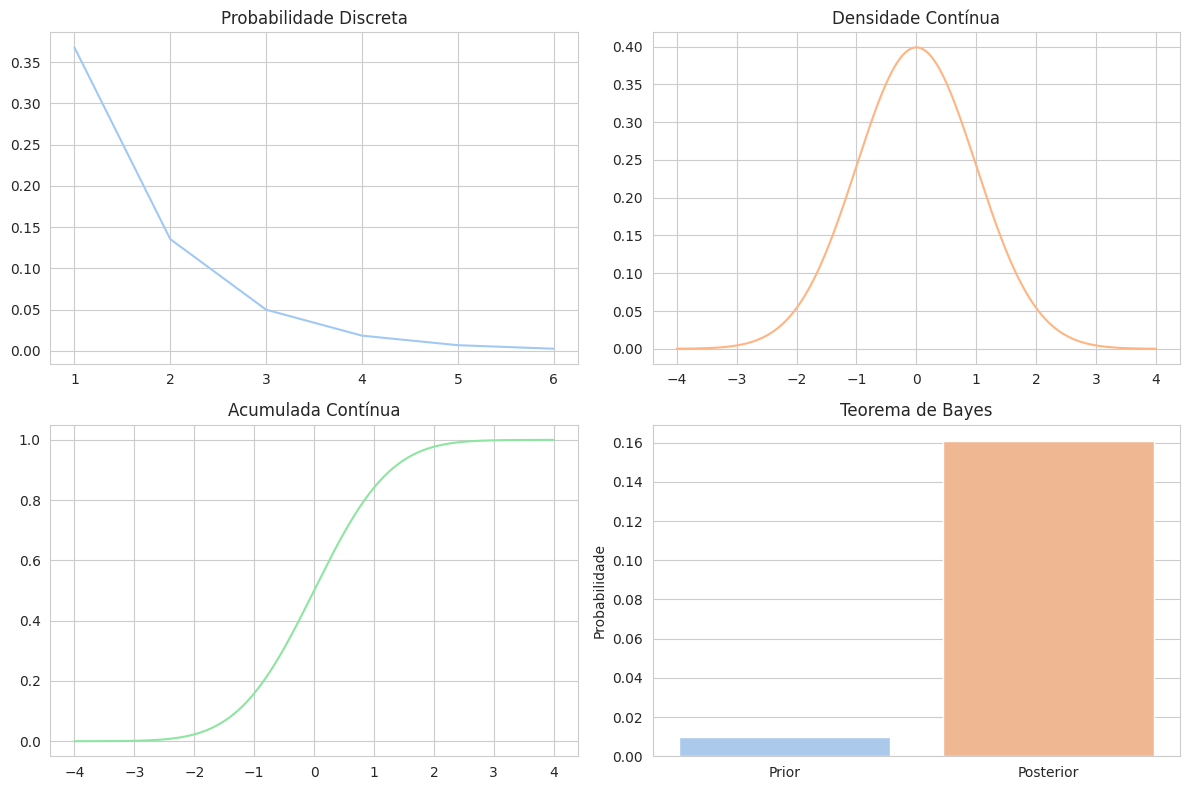

In [55]:
# Configurações gerais
# x_discrete = np.arange(1, 7)  # Exemplo: variável aleatória discreta (dado)
x_continuous = np.linspace(-4, 4, 1000)  # Exemplo: variável aleatória contínua (distribuição normal)

# Funções de Probabilidade e Densidade
# Discreta
def prob_discrete(x):
    return stats.expon.pdf(x, loc=0, scale=1)  # Exponencial com média 1
    # return np.full_like(x, 1/6)  # Distribuição uniforme

# Contínua (exemplo: normal)
def dens_continuous(x):
    return stats.norm.pdf(x, loc=0, scale=1)  # Normal padrão

# Função de Distribuição Acumulada (exemplo: normal)
def acumulada_continuous(x):
    return stats.norm.cdf(x, loc=0, scale=1)  # Normal padrão acumulada

# Teorema de Bayes (implementação genérica)
def bayes(prior, likelihood, marginal):
    return (likelihood * prior) / marginal

# Criando o grid de plots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: prob_discrete
sns.lineplot(x=x_discrete, y=prob_discrete(x_discrete), ax=axes[0, 0], color=paleta_cores[0])
axes[0, 0].set_title("Probabilidade Discreta")

# Plot 2: dens_continuous
sns.lineplot(x=x_continuous, y=dens_continuous(x_continuous), ax=axes[0, 1], color=paleta_cores[1])
axes[0, 1].set_title("Densidade Contínua")

# Plot 3: acumulada_continuous
sns.lineplot(x=x_continuous, y=acumulada_continuous(x_continuous), ax=axes[1, 0], color=paleta_cores[2])
axes[1, 0].set_title("Acumulada Contínua")

# Plot 4: Bayes (Exemplo com valores fixos)
prior = 0.01
likelihood = 0.95
marginal = 0.059
posterior = bayes(prior, likelihood, marginal)

# Criando um gráfico de barras para o teorema de bayes
x_bayes = ['Prior', 'Posterior']
y_bayes = [prior, posterior]

# Atribuindo 'x' ao argumento 'hue' e definindo legend=False
sns.barplot(x=x_bayes, y=y_bayes, ax=axes[1,1], hue=x_bayes, palette=paleta_cores[:2], legend=False) #Usando apenas as duas primeiras cores da paleta

axes[1, 1].set_title("Teorema de Bayes")
axes[1, 1].set_ylabel("Probabilidade")

plt.tight_layout()
plt.show()

## **Referências**

- FONSECA, Jairo Simon da, MARTINS, Gilberto de Andrade. **Curso de Estatística**. 6. ed. São Paulo: Atlas, 1996.

- BLITZSTEIN, Joseph K.; HWANG, Jessica. **Introduction to probability**. Chapman and Hall/CRC, 2019.

- **_Random variable_** Wikipedia: The Free Encyclopedia. Disponível em: https://en.wikipedia.org/wiki/Random_variable. Acesso em: 16 de Fev. de 2025.


- **_Cumulative distribution function_** Wikipedia: The Free Encyclopedia. Disponível em: https://en.wikipedia.org/wiki/Cumulative_distribution_function. Acesso em: 16 de Fev. de 2025.

- **_Probability density function_** Wikipedia: The Free Encyclopedia. Disponível em: https://en.wikipedia.org/wiki/Probability_density_function. Acesso em: 17 de Fev. de 2025.

